In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [16]:


df = pd.read_csv("touristData.csv")
df.columns = df.columns.str.strip()


In [17]:
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['month_num'] = df['month'].str.capitalize().map(month_map)

le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['originCountry'])

In [18]:

features = ['year', 'month_num', 'country_encoded', 'dollarRate', 'consumerPriceIndex']
X = df[features]
y = df['totalCount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


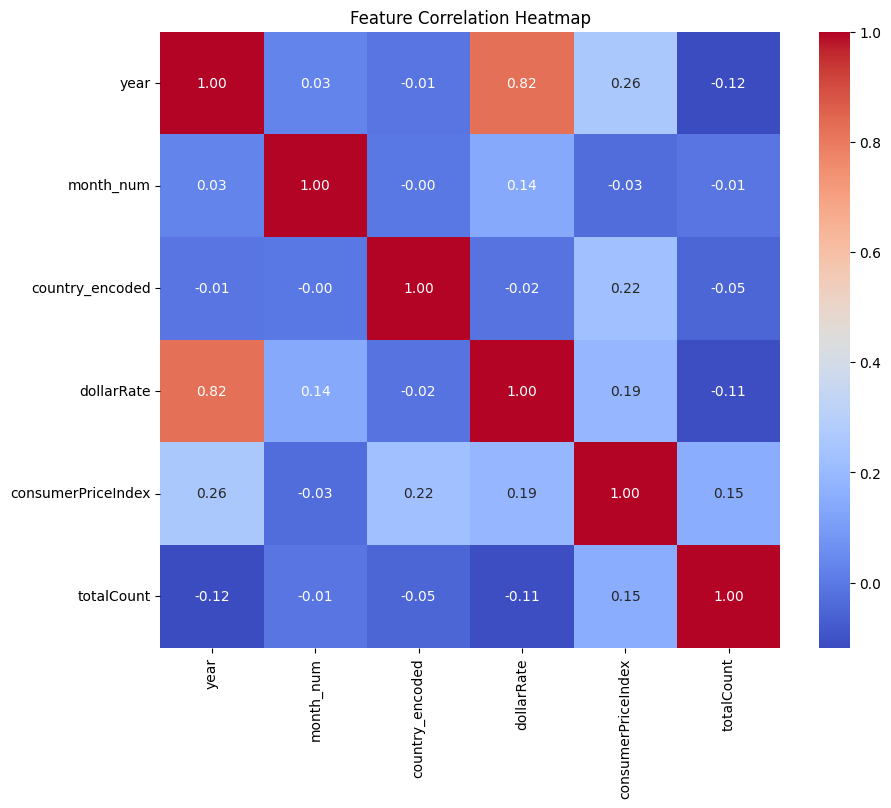

In [20]:
# --- GRAPH 1: Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['totalCount']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

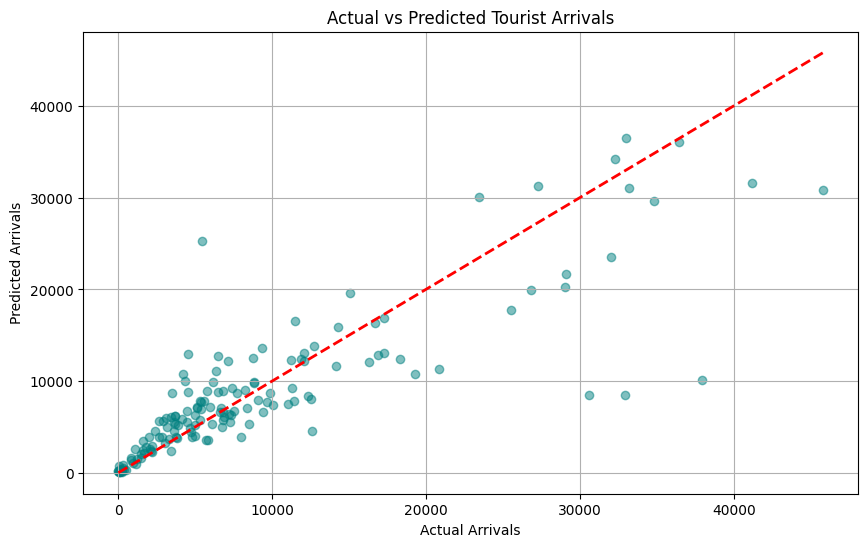

In [21]:

y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Arrivals')
plt.ylabel('Predicted Arrivals')
plt.title('Actual vs Predicted Tourist Arrivals')
plt.grid(True)
plt.show()

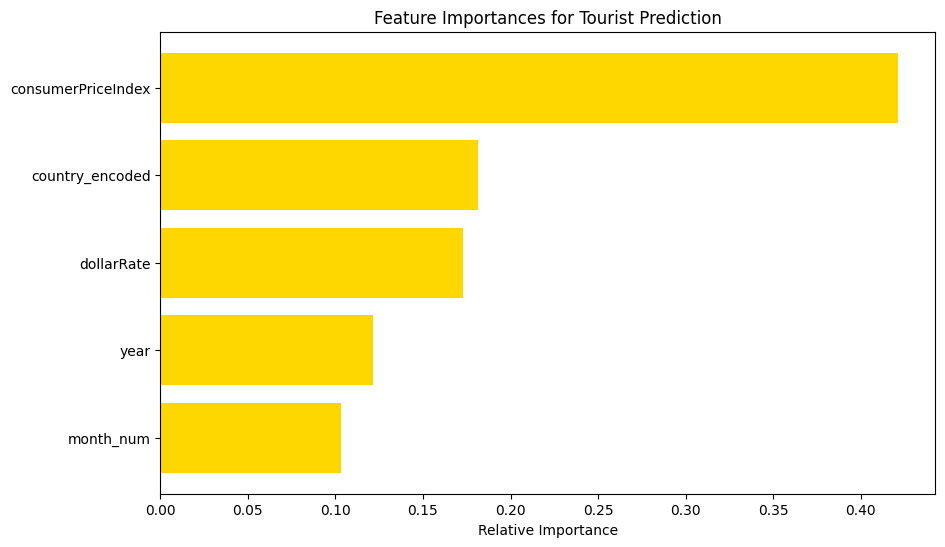

In [22]:

importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Tourist Prediction')
plt.barh(range(len(indices)), importances[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()